In [1]:
%matplotlib inline

# DataFrame in Pandas

Dataframe are a data structure equivalent to individual tables in a database.

Nowadays every high level programming language has its own implementation of the same concept

A dataframe is a table, indicized with rows and columns.

Imagine a table containing information about people:
* each row represent a person and is uniquely associate to the by the row index
* each column represent something measured about that person

### [python: Pandas DataFrames](http://pandas.pydata.org/)

### [R: dataframes](https://en.wikibooks.org/wiki/R_Programming/Working_with_data_frames)

### [Matlab: Table](http://blogs.mathworks.com/loren/2013/09/10/introduction-to-the-new-matlab-data-types-in-r2013b/)

### [Julia: DataFrames](https://en.wikibooks.org/wiki/Introducing_Julia/DataFrames)

In [2]:
import pandas as pd
print(pd.__version__)

1.2.3


In [4]:
# hidden data generation cell
import pandas as pd

data = pd.DataFrame(
    [
        ('Andrea', 24, 178, 'Male'),
        ('Maria', 33, 154, 'Female'),
        ('Luca', 30, 175, 'Male'),
    ],
    columns=['name', 'age', 'height', 'sex'],
)
data.set_index('name', inplace=True)

In [5]:
data

,age,height,sex
name,,,
Andrea,24,178,Male
Maria,33,154,Female
Luca,30,175,Male


In [6]:
# skipped cell about hierarchical indexes
# Righe e colonne possono avere indici **GERARCHICI**, 
# in cui ho più livelli di indicizzazione delle mie informazioni

import pandas as pd

data = pd.DataFrame(
    [
        ('Andrea', '2015', 'residenza', 'Rimini', 'via stretta 20'),
        ('Andrea', '2015', 'domicilio', 'Bologna', 'via larga 30'),
        ('Andrea', '2016', 'residenza', 'Rimini', 'via stretta 20'),
        ('Andrea', '2016', 'domicilio', 'Bologna', 'via larga 30'),
        ('Giulio', '2015', 'residenza', 'Rimini', 'via giusta 50'),
        ('Giulio', '2015', 'domicilio', 'Bologna', 'via falsa 40'),
        ('Giulio', '2016', 'residenza', 'Bologna', 'via torna 10'),
        ('Giulio', '2016', 'domicilio', 'Bologna', 'via torna 10'),
    ], 
    columns=['nome', 'anno', 'tipologia', 'città', 'indirizzo'],
)
data.set_index(['nome', 'anno', 'tipologia'], inplace=True)
data = data.unstack()
data.columns = data.columns.swaplevel(0, 1)
#data.sortlevel(0, axis=1, inplace=True)

Dataframes allow us to collect and manipulat informations in a very comfortable way, and are the central pillar of modern data analysis.

A special role is played by the data that are organized as **TIDY DATA**, term introduced in the community by Wickham in 2010 in his [seminal paper](http://vita.had.co.nz/papers/tidy-data.pdf).

Tidy data is a way of structuring your data that makes analysis, visualization and data maitenance particularly easy.
It is a simplified form of **database normalization**, a series of principles on how to design a good database. 

A tidy dataframe is defined as having the following properties:
* a table represent a single set of measurements
* every measured variable is represented by a column, and contains a single, well defined measurement
* every observed unit is represented by a row

where:

* observation: the physiological informations about a person
* observations units: each person
* variables: age, sex, height, etc...

An experiment will provide several tidy table (a database), connected logically one to the other.

In [7]:
import pandas as pd

data = pd.DataFrame(
    [
        ('Andrea', '2015', 'residenza', 'Rimini', 'via stretta 20'),
        ('Andrea', '2015', 'domicilio', 'Bologna', 'via larga 30'),
        ('Andrea', '2016', 'residenza', 'Rimini', 'via stretta 20'),
        ('Andrea', '2016', 'domicilio', 'Bologna', 'via larga 30'),
        ('Giulio', '2015', 'residenza', 'Rimini', 'via giusta 50'),
        ('Giulio', '2015', 'domicilio', 'Bologna', 'via falsa 40'),
        ('Giulio', '2016', 'residenza', 'Bologna', 'via torna 10'),
        ('Giulio', '2016', 'domicilio', 'Bologna', 'via torna 10'),
    ], 
    columns=['nome', 'anno', 'tipologia', 'città', 'indirizzo'],
)

In [8]:
data

,nome,anno,tipologia,città,indirizzo
0,Andrea,2015,residenza,Rimini,via stretta 20
1,Andrea,2015,domicilio,Bologna,via larga 30
2,Andrea,2016,residenza,Rimini,via stretta 20
3,Andrea,2016,domicilio,Bologna,via larga 30
4,Giulio,2015,residenza,Rimini,via giusta 50
5,Giulio,2015,domicilio,Bologna,via falsa 40
6,Giulio,2016,residenza,Bologna,via torna 10
7,Giulio,2016,domicilio,Bologna,via torna 10


The important thing to remember with this type of data is that this **might not be the ideal format for the analysis** you have in mind.

The tidy format is brilliant, especially for **long term storage and to keep the metadata about the measurements**, but some analysis might need the data to be transformed in non-tidy formats (for example to evaluate differences in various time points)

For this reason, all the libraries that manage dataframe have a **strong focus on data transformation**, reshaping the data from one form to the other.
This allows to easily obtain the best structure for the analysis we want to do without sacrificing the data quality in long term storage.

# Introduction to Pandas

**pandas** is the main library in python that allows one to manipulated dataframe structures.

The library introduces the class **DataFrame**, that holds a single table made out of various **Series**, that represents each column, all sharing the same index

One of the strenghts of pandas is the ability to read and write almost any tabular format.

For example we can download and parse tables from a wikipedia page with a single command

We will discuss:

* reading and preprocessing the dataframe
* performing selections on it
* dataframe manipulation:
    * groupby
    * joins
    * pivoting
* simple visualization
* advanced visualization


In [2]:
import pandas as pd
# import lxml - required for the download
import numpy as np

In [3]:
page = 'https://en.wikipedia.org/wiki/List_of_highest-grossing_films'
wikitables = pd.read_html(page)

In [4]:
len(wikitables)

92

The page contains several tables, and we obtain a list with all of them.

The one we are interested about is the first one, the proper table of the highest grossing movies.

In [5]:
wikitables[0].head()

,Rank,Peak,Title,Worldwide gross,Year,Reference(s)
0,1,1,Avengers: Endgame,"$2,797,800,564",2019,[# 1][# 2]
1,2,1,Avatar,"$2,790,439,000",2009,[# 3][# 4]
2,3,1,Titanic,"$2,194,439,542",1997,[# 5][# 6]
3,4,3,Star Wars: The Force Awakens,"$2,068,223,624",2015,[# 7][# 8]
4,5,4,Avengers: Infinity War,"$2,048,359,754",2018,[# 9][# 10]


Reading functions contain tens of parameters to allow us to read the data exactly as we need them.

In [6]:
wikitables = pd.read_html(
    page,
    attrs={"class":"wikitable sortable plainrowheaders"},
    index_col='Rank',
)
wikitables[0].head()

,Peak,Title,Worldwide gross,Year,Reference(s)
Rank,,,,,
1,1,Avengers: Endgame,"$2,797,800,564",2019,[# 1][# 2]
2,1,Avatar,"$2,790,439,000",2009,[# 3][# 4]
3,1,Titanic,"$2,194,439,542",1997,[# 5][# 6]
4,3,Star Wars: The Force Awakens,"$2,068,223,624",2015,[# 7][# 8]
5,4,Avengers: Infinity War,"$2,048,359,754",2018,[# 9][# 10]


In [13]:
# percentage variation
url = "https://www.statbureau.org/en/united-states/inflation-tables/inflation.monthly.csv"
temp = pd.read_csv(url, index_col='Year')
temp.columns = [col.strip() for col in temp.columns]
totals = temp[['Total']]
del temp['Total']
fractional_variation =(temp.stack()+100)/100
fractional_variation = fractional_variation.cumprod()

In [43]:
wikitables = pd.read_html(page)
dataframe = wikitables[0].copy()

The dataframe behave similarly to a dictionary.

the column names are the keys, and the values are the Series associated with those names

In [44]:
dataframe.columns

Index(['Rank', 'Peak', 'Title', 'Worldwide gross', 'Year', 'Reference(s)'], dtype='object')

In [45]:
dataframe['Year'].head()

0    2019
1    2009
2    1997
3    2015
4    2018
Name: Year, dtype: int64

## Series

Series behave similarly to numpy array in regards to vectorization, but they join values based on the index and not the order of the elements

In [46]:
dataframe['Year'].head() * 100

0    201900
1    200900
2    199700
3    201500
4    201800
Name: Year, dtype: int64

In [47]:
a = pd.Series(
    [1, 2, 3],
    index=['a', 'b', 'c'],
)
a

a    1
b    2
c    3
dtype: int64

In [48]:
b = pd.Series(
    [5, 6, 7],
    index=['c', 'a', 'b'],
)
b

c    5
a    6
b    7
dtype: int64

In [49]:
a+b

a    7
b    9
c    8
dtype: int64

Series and DataFrames inherit also the slicing properties of numpy arrays

In [50]:
a = pd.Series(
    [1, 2, 3], 
    index=['a', 'b', 'c'],
)
a>1

a    False
b     True
c     True
dtype: bool

In [51]:
a[a>1]

b    2
c    3
dtype: int64

In [52]:
a = pd.Series(
    [1, 2, 3, 4, 5, 6],
    index=['a', 'b', 'c', 'd', 'e', 'f'],
)
idx_1 = a>2
idx_2 = a<5
a[idx_1 & idx_2]

c    3
d    4
dtype: int64

They can be sliced on the index as well, both by single keys and range of keys.

the range of keys are referred to the order of the index, not the natural sorting of the values contained in it

**NOTE: the slicing also contains the last value of the slice as well!**

In [53]:
a['a']

1

In [54]:
a['a':'b']

a    1
b    2
dtype: int64

In [55]:
b = pd.Series([5, 6, 7], index=['c', 'a', 'b'])
b['c':'a']

c    5
a    6
dtype: int64

## Series as elements of a DataFrame

I can manipulate columns in various ways, starting from the possibility of removing unwanted ones

In [56]:
del dataframe['Reference(s)']

In [57]:
dataframe.head()

,Rank,Peak,Title,Worldwide gross,Year
0,1,1,Avengers: Endgame,"$2,797,800,564",2019
1,2,1,Avatar,"$2,790,439,000",2009
2,3,1,Titanic,"$2,194,439,542",1997
3,4,3,Star Wars: The Force Awakens,"$2,068,223,624",2015
4,5,4,Avengers: Infinity War,"$2,048,359,754",2018


In [58]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rank             50 non-null     int64 
 1   Peak             50 non-null     object
 2   Title            50 non-null     object
 3   Worldwide gross  50 non-null     object
 4   Year             50 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1.4+ KB


In [59]:
dataframe.select_dtypes(include='int64').head()

,Rank,Year
0,1,2019
1,2,2009
2,3,1997
3,4,2015
4,5,2018


In [60]:
dataframe.select_dtypes(include=np.number).head()

,Rank,Year
0,1,2019
1,2,2009
2,3,1997
3,4,2015
4,5,2018


In [61]:
dataframe['Title'].head()

0               Avengers: Endgame
1                          Avatar
2                         Titanic
3    Star Wars: The Force Awakens
4          Avengers: Infinity War
Name: Title, dtype: object

In [62]:
dataframe.sort_values('Year').head()

,Rank,Peak,Title,Worldwide gross,Year
39,40,1,Jurassic Park,"$1,029,939,903",1993
48,49,2,The Lion King,"$968,483,777",1994
2,3,1,Titanic,"$2,194,439,542",1997
41,42,2,Star Wars: Episode I – The Phantom Menace,"$1,027,044,677",1999
46,47,2PS,Harry Potter and the Philosopher's Stone,"$975,051,288",2001


In [63]:
dataframe.sort_values('Year', ascending=False).head()

,Rank,Peak,Title,Worldwide gross,Year
0,1,1,Avengers: Endgame,"$2,797,800,564",2019
9,10,10,Frozen II,"$1,450,026,933",2019
36,37,34,Aladdin,"$1,050,693,953",2019
32,33,30,Toy Story 4,"$1,073,394,593",2019
31,32,32,Star Wars: The Rise of Skywalker,"$1,074,144,248",2019


In [64]:
dataframe.query("Year>=2017")

,Rank,Peak,Title,Worldwide gross,Year
0,1,1,Avengers: Endgame,"$2,797,800,564",2019
4,5,4,Avengers: Infinity War,"$2,048,359,754",2018
6,7,7,The Lion King,"$1,656,943,394",2019
9,10,10,Frozen II,"$1,450,026,933",2019
11,12,9,Black Panther,"$1,346,913,161",2018
13,14,9,Star Wars: The Last Jedi,"$1,332,539,889",2017
14,15,12,Jurassic World: Fallen Kingdom,"$1,309,484,461",2018
16,17,10,Beauty and the Beast,"$1,263,521,126",2017
17,18,15,Incredibles 2,"$1,242,805,359",2018
18,19,11,The Fate of the Furious,"F8$1,238,764,765",2017


In [65]:
selection = dataframe['Year']>=2017
selection.head()

0     True
1    False
2    False
3    False
4     True
Name: Year, dtype: bool

In [66]:
dataframe[selection]

,Rank,Peak,Title,Worldwide gross,Year
0,1,1,Avengers: Endgame,"$2,797,800,564",2019
4,5,4,Avengers: Infinity War,"$2,048,359,754",2018
6,7,7,The Lion King,"$1,656,943,394",2019
9,10,10,Frozen II,"$1,450,026,933",2019
11,12,9,Black Panther,"$1,346,913,161",2018
13,14,9,Star Wars: The Last Jedi,"$1,332,539,889",2017
14,15,12,Jurassic World: Fallen Kingdom,"$1,309,484,461",2018
16,17,10,Beauty and the Beast,"$1,263,521,126",2017
17,18,15,Incredibles 2,"$1,242,805,359",2018
18,19,11,The Fate of the Furious,"F8$1,238,764,765",2017


## Dataframe manipulation

Often real data arrives in a format that can only be described as "far from optimal"

The first (and major) part of data analysis is data cleaning and preprocessing in a decent form

In our case, for example, we might need to adjust the earning of each movies, as we would like to treat them as a number and not strings

In [70]:
c = 'Worldwide gross'
dataframe[c].str.split('$').head()

0    [, 2,797,800,564]
1    [, 2,790,439,000]
2    [, 2,194,439,542]
3    [, 2,068,223,624]
4    [, 2,048,359,754]
Name: Worldwide gross, dtype: object

In [71]:
dataframe[c].str.split('$').str[-1].head()

0    2,797,800,564
1    2,790,439,000
2    2,194,439,542
3    2,068,223,624
4    2,048,359,754
Name: Worldwide gross, dtype: object

In [75]:
dataframe[c] = dataframe[c].str.split('$').str[-1]
dataframe[c] = dataframe[c].str.replace(',', '')
dataframe[c] = dataframe[c].astype(np.int64)

In [76]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rank             50 non-null     int64 
 1   Peak             50 non-null     object
 2   Title            50 non-null     object
 3   Worldwide gross  50 non-null     int64 
 4   Year             50 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.6+ KB


Sometimes, one needs to use some violence...

In [77]:
try:
    dataframe['Peak'].astype(int)
except ValueError as e:
    print(e)

invalid literal for int() with base 10: '4TS3'


In [78]:
print(list(dataframe['Peak'].unique()))

['1', '3', '4', '7', '10', '5', '9', '12', '15', '11', '20', '2', '24', '23', '31', '32', '30', '4TS3', '34', '6', '22', '14', '2PS', '19DM2']


Given that there is no simple transformation, we need to use **regular expressions**.

regular expression are a way to express text structure and to specify which part to extract from it

In [79]:
import re
regex = re.compile('(\d+)\D*\d*')
regex = re.compile(
    '(\d+)' # extract this group, composed of one or more digits
    '\D*' # can be followed by 0 or more non digits
    '\d*' # can be followed by 0 or more digits
)
dataframe['Peak'] = dataframe['Peak'].str.extract(regex, expand=False)
dataframe['Peak'] = dataframe['Peak'].astype(int)

In [83]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rank             50 non-null     int64 
 1   Peak             50 non-null     int32 
 2   Title            50 non-null     object
 3   Worldwide gross  50 non-null     int64 
 4   Year             50 non-null     int64 
dtypes: int32(1), int64(3), object(1)
memory usage: 1.6+ KB


In [84]:
dataframe['Rank'] = dataframe['Rank'].astype(np.int64)

In [85]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rank             50 non-null     int64 
 1   Peak             50 non-null     int32 
 2   Title            50 non-null     object
 3   Worldwide gross  50 non-null     int64 
 4   Year             50 non-null     int64 
dtypes: int32(1), int64(3), object(1)
memory usage: 1.6+ KB


In [86]:
dataframe.describe()

,Rank,Peak,Worldwide gross,Year
count,50.00000,50.000000,5.000000e+01,50.000000
mean,25.50000,10.980000,1.291294e+09,2012.960000
std,14.57738,9.725812,4.193347e+08,6.639277
min,1.00000,1.000000,9.665506e+08,1993.000000
25%,13.25000,3.250000,1.046959e+09,2011.000000
50%,25.50000,7.000000,1.130101e+09,2015.000000
75%,37.75000,18.000000,1.339405e+09,2018.000000
max,50.00000,34.000000,2.797801e+09,2019.000000


## DataFrame visualization

We can do it with both matplotlib and pandas.

both have special methods to display the data contained in a dataframe.

Later on we will see a more appropriate library, **seaborn**, but for now we will use a *quick & dirty* approach

In [87]:
import pylab as plt

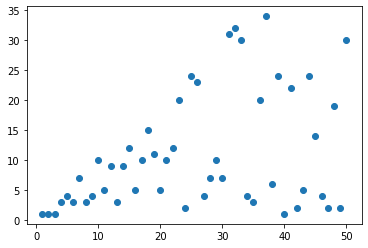

In [88]:
plt.scatter('Rank', 'Peak', data=dataframe)

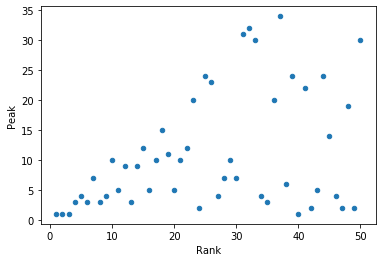

In [89]:
dataframe.plot.scatter('Rank', 'Peak')

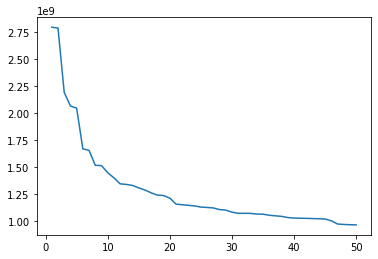

In [90]:
plt.plot('Rank', 'Worldwide gross', data=dataframe)

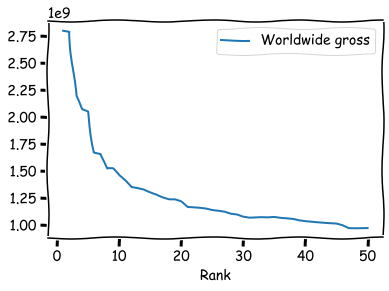

In [92]:
with plt.xkcd():
    dataframe.plot('Rank', 'Worldwide gross')

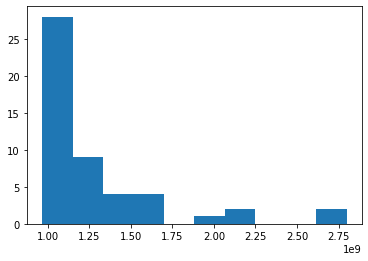

In [93]:
plt.hist('Worldwide gross', data=dataframe);

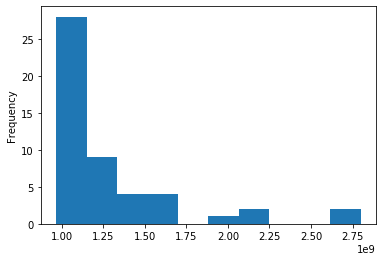

In [94]:
dataframe['Worldwide gross'].plot.hist()

pandas is actually just creating a matplotlib plot under the hood, so you can just extract it and modify it as any other plot

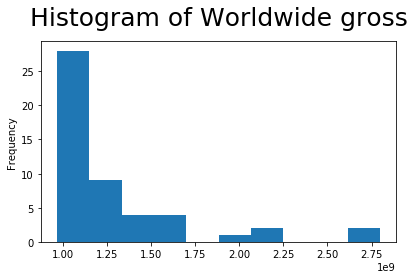

In [95]:
dataframe['Worldwide gross'].plot.hist()
ax = plt.gca()
fig = plt.gcf()
ax.set_title("Histogram of Worldwide gross", fontsize=25, y=1.05)
fig.tight_layout()

### Multidimensional dataframes using XArray

Pandas dataframes (and in general the dataframe structure) is designed to represent data stored in table form, with columns and rows, containing scalar data such as height, weight, age and so on...

For more complicated data, where different kind of data structure need to be related to each other while keeping most of the goodies that pandas provides, an alternative is [**XArray**](http://xarray.pydata.org/en/stable/).

This library includes the equivalent of the pandas dataframe and series (**DataArray** and **DataSet**), that provide an efficient and comfortable ways to manipulate multidimensional arrays, where several of them share one of more of their indexes

## Manipulation on DataFrames

we will discuss some common operations on dataframes:

* Groupby
* join and merge
* pivot, melt, stackinging

### Groupby

this is a whole family of operations, that can be summarized as:

1. divide the data in various groups
2. apply a transform on these data (mapping or aggregation)
3. merge the results from the previous step

the result of step 3 is going to be a value for group in the case of aggregation operations (sum, average, etc...) or a new versione of the dataframe with the transformed values.

In [96]:
wiki = "https://it.wikipedia.org/wiki/"
url_popolazione = wiki + "Comuni_d%27Italia_per_popolazione"
url_superficie = wiki + "Primi_100_comuni_italiani_per_superficie"

In [97]:
comuni_popolazione = pd.read_html(url_popolazione, header=0)
comuni_popolazione = comuni_popolazione[0]
comuni_popolazione.head()

,N°,Comune,Regione,Provincia / Città metropolitana,Abitanti
0,1,Roma,Lazio,Roma,2 847 490
1,2,Milano,Lombardia,Milano,1 388 223
2,3,Napoli,Campania,Napoli,955 503
3,4,Torino,Piemonte,Torino,875 063
4,5,Palermo,Sicilia,Palermo,659 052


In [100]:
comuni_superficie = pd.read_html(url_superficie, header=0)
# might change, right now the 0 it's a info box
comuni_superficie = comuni_superficie[1] 
comuni_superficie.head()

,Pos.,Comune,Regione,Provincia,Superficie (km²)
0,1,Roma,Lazio,Roma,128736
1,2,Ravenna,Emilia-Romagna,Ravenna,65382
2,3,Cerignola,Puglia,Foggia,59393
3,4,Noto,Sicilia,Siracusa,55499
4,5,Sassari,Sardegna,Sassari,54704


In [101]:
comuni_superficie.groupby('Regione').mean()

,Pos.,Superficie (km²)
Regione,,
Abruzzo,9.000000,47391.000000
Basilicata,54.666667,29641.000000
Calabria,52.333333,28937.666667
Emilia-Romagna,56.200000,31154.100000
Lazio,29.250000,56263.750000
Liguria,80.000000,24029.000000
Lombardia,94.500000,22701.500000
Marche,84.333333,24168.000000
Puglia,46.210526,33034.263158


In [102]:
g = comuni_superficie.groupby('Regione')
g.aggregate([np.mean, np.std, pd.Series.count])

Pos.                  Superficie (km²)  \
                          mean        std count             mean   
Regione                                                            
Abruzzo               9.000000        NaN     1     47391.000000   
Basilicata           54.666667  33.321665     3     29641.000000   
Calabria             52.333333  26.407070     3     28937.666667   
Emilia-Romagna       56.200000  30.828558    10     31154.100000   
Lazio                29.250000  24.743686     4     56263.750000   
Liguria              80.000000        NaN     1     24029.000000   
Lombardia            94.500000   2.121320     2     22701.500000   
Marche               84.333333  24.542480     3     24168.000000   
Puglia               46.210526  29.628400    19     33034.263158   
Sardegna             62.625000  32.762947     8     29839.375000   
Sicilia              46.300000  27.380554    20     32300.150000   
Toscana              52.142857  26.590505    14     29941.357143   
Trentino-Alto Adige  56.000000  24.041631     2     27485.000000   
Umbria               32.142857  20.860078     7     36175.285714   
Veneto               49.000000  29.461840     3     30853.000000   

                                         
                              std count  
Regione                                  
Abruzzo                       NaN     1  
Basilicata            8419.030110     3  
Calabria              5408.599850     3  
Emilia-Romagna       13146.217719    10  
Lazio                48688.754926     4  
Liguria                       NaN     1  
Lombardia               40.305087     2  
Marche                2632.717987     3  
Puglia               10048.492396    19  
Sardegna             11275.484278     8  
Sicilia               9656.570331    20  
Toscana               7114.648125    14  
Trentino-Alto Adige   3877.773588     2  
Umbria                9897.267396     7  
Veneto                9300.741315     3

In [103]:
comuni_superficie.groupby('Regione')['Superficie (km²)'].count()

Regione
Abruzzo                 1
Basilicata              3
Calabria                3
Emilia-Romagna         10
Lazio                   4
Liguria                 1
Lombardia               2
Marche                  3
Puglia                 19
Sardegna                8
Sicilia                20
Toscana                14
Trentino-Alto Adige     2
Umbria                  7
Veneto                  3
Name: Superficie (km²), dtype: int64

In [104]:
g = comuni_superficie.groupby('Regione')['Superficie (km²)']
g.count().sort_values(ascending=False)

Regione
Sicilia                20
Puglia                 19
Toscana                14
Emilia-Romagna         10
Sardegna                8
Umbria                  7
Lazio                   4
Veneto                  3
Marche                  3
Calabria                3
Basilicata              3
Trentino-Alto Adige     2
Lombardia               2
Liguria                 1
Abruzzo                 1
Name: Superficie (km²), dtype: int64

In [105]:
g = comuni_popolazione.groupby('Regione')['Abitanti']
g.count().sort_values(ascending=False)

Regione
Campania                 19
Sicilia                  16
Lombardia                15
Puglia                   15
Toscana                  13
Emilia-Romagna           13
Lazio                    11
Calabria                  6
Veneto                    6
Piemonte                  6
Abruzzo                   5
Liguria                   4
Sardegna                  4
Umbria                    3
Marche                    3
Friuli-Venezia Giulia     3
Trentino-Alto Adige       2
Basilicata                2
Name: Abitanti, dtype: int64

### Join and Merge

When I have two separate tables that share (at least partially) their index, I can join the two.

In this case, for example, I can try to obtain for each town their surface and population.

In general this can be used to keep the data tables in a clean and tidy format for storage, and then merge the information I need for each analysis.

For example, in a tidy dataset where I have several measurements for each subject, it would not be a good idea to store their age repeatedly (could lead to inconsistency), but it would be better to keep it as a separate data table and then join them if needed

There are several ways to combine the two tables together, expressed by the keyword **how**.
these are:

* left join
* right join
* inner join
* outer join

#### left and right join

in the **left join** the left dataframe is kept completely.

the right dataframe is selected based on the index of the first one:
* if the index does not appear in the first one, the item is not selected
* if it appears multiple times, it is selected multiple times

this is the default join in pandas and most databases.
the **right join** is exactly the opposite but using the index of the right dataframe to select on the left one

#### inner and outer join

In the **inner join** only the elements that are common to both dataframes indexes are kept (it is akin to an intersection of the two).

In the **outer join** all the elements are kept, with all the possible combinations repeated (it is akin to a combination of cartesian products of the elements)

In [3]:
a = pd.DataFrame(
    [
        ('Antonio', 'M'),
        ('Marco', 'M'),
        ('Francesca', 'F'),
        ('Giulia', 'F'),
    ], 
    columns = ['name', 'sex'])

b = pd.DataFrame(
    [
        ('Antonio', 15),
        ('Marco', 10),
        ('Marco', 12),
        ('Carlo', 23),
        ('Francesca', 20),
    ], 
    columns = ['name', 'expenses'])

In [4]:
a

,name,sex
0,Antonio,M
1,Marco,M
2,Francesca,F
3,Giulia,F


In [5]:
b

,name,expenses
0,Antonio,15
1,Marco,10
2,Marco,12
3,Carlo,23
4,Francesca,20


In [6]:
pd.merge(a, b, on='name', how='left')

,name,sex,expenses
0,Antonio,M,15.0
1,Marco,M,10.0
2,Marco,M,12.0
3,Francesca,F,20.0
4,Giulia,F,NaN


We can validate the known relationships between these tables using the `validate` option.

In this case the relationship is `one to many`.

this can save us from surprises/errors in the source data!

In [13]:
pd.merge(a, b, on='name', how='left', validate="1:m")

,name,sex,expenses
0,Antonio,M,15.0
1,Marco,M,10.0
2,Marco,M,12.0
3,Francesca,F,20.0
4,Giulia,F,NaN


In [14]:
# if we validate with one to one it does fail
pd.merge(a, b, on='name', how='left', validate="1:1")

MergeError: Merge keys are not unique in right dataset; not a one-to-one merge

In [7]:
pd.merge(a, b, on='name', how='right')

,name,sex,expenses
0,Antonio,M,15
1,Marco,M,10
2,Marco,M,12
3,Carlo,NaN,23
4,Francesca,F,20


In [8]:
pd.merge(a, b, on='name', how='inner')

,name,sex,expenses
0,Antonio,M,15
1,Marco,M,10
2,Marco,M,12
3,Francesca,F,20


In [9]:
pd.merge(a, b, on='name', how='outer')

,name,sex,expenses
0,Antonio,M,15.0
1,Marco,M,10.0
2,Marco,M,12.0
3,Francesca,F,20.0
4,Giulia,F,NaN
5,Carlo,NaN,23.0


How does this joins look for our data?

In [113]:
_ = pd.merge(
    comuni_popolazione,
    comuni_superficie,
    on=['Comune', 'Regione'],
)
_.head()

,N°,Comune,Regione,Provincia / Città metropolitana,Abitanti,Pos.,Provincia,Superficie (km²)
0,1,Roma,Lazio,Roma,2 847 490,1,Roma,128736
1,6,Genova,Liguria,Genova,575 577,80,Genova,24029
2,11,Venezia,Veneto,Venezia,259 736,15,Venezia,41590
3,17,Parma,Emilia-Romagna,Parma,197 478,62,Parma,26060
4,18,Taranto,Puglia,Taranto,195 279,71,Taranto,24986


In [114]:
len(pd.merge(
    comuni_popolazione, 
    comuni_superficie,
    on='Comune',
    how='right',
))

100

In [115]:
len(pd.merge(
    comuni_popolazione, 
    comuni_superficie,
    on='Comune',
    how='left',
))

146

In [116]:
len(pd.merge(
    comuni_popolazione,
    comuni_superficie,
    on='Comune',
    how='inner',
))

37

In [117]:
len(pd.merge(
    comuni_popolazione,
    comuni_superficie,
    on='Comune',
    how='outer',
))

209

### Pivot, melt and stacking

**Pivoting** is a family of operations that allows to create aggregated tables (including contingency tables) starting from a tidy dataset.

It takes a tidy dataset and put it in a wide format. (the inverse operation is usually referred as **melting**)

To perform a pivot one chooses:
* one column whose unique values are going to be the new index
* one column whose unique values are going to be the new column names
* one column whose values are going to be fill the new table

if there is more than one value that correspond to each pair of values (index and column) then one needs to specify some aggregation function to summarize those values, such as sum, average, counts, standard deviation, etc...

In [118]:
spese = [
    ('Antonio', 'cat', 4),
    ('Antonio', 'cat', 5),
    ('Antonio', 'cat', 6),

    ('Giulia', 'cat', 3),
    ('Giulia', 'dog', 7),
    ('Giulia', 'dog', 8),
]

spese = pd.DataFrame(spese, columns = ['name', 'animal', 'expenses'])
spese

,name,animal,expenses
0,Antonio,cat,4
1,Antonio,cat,5
2,Antonio,cat,6
3,Giulia,cat,3
4,Giulia,dog,7
5,Giulia,dog,8


In [119]:
pd.pivot_table(
    spese,
    index='name',
    columns='animal',
    values='expenses',
    aggfunc=np.sum,
)

animal,cat,dog
name,,
Antonio,15.0,NaN
Giulia,3.0,15.0


In [120]:
pd.pivot_table(
    spese,
    index='name',
    columns='animal',
    values='expenses',
    aggfunc=np.sum,
    fill_value=0,
)

animal,cat,dog
name,,
Antonio,15,0
Giulia,3,15


In [121]:
pd.pivot_table(
    spese,
    index='name',
    columns='animal',
    values='expenses',
    aggfunc=np.sum,
    fill_value=0,
    margins=True,
)

animal,cat,dog,All
name,,,
Antonio,15,0,15
Giulia,3,15,18
All,18,15,33


In [122]:
pd.pivot_table(
    spese,
    index='name',
    columns='animal',
    values='expenses',
    aggfunc=pd.Series.count,
    fill_value=0,
)

animal,cat,dog
name,,
Antonio,3,0
Giulia,1,2


In [123]:
r = pd.pivot_table(
    spese,
    index='name',
    columns='animal',
    values='expenses',
    aggfunc=pd.Series.count,
    fill_value=0,
)
r = r.reset_index()
r

animal,name,cat,dog
0,Antonio,3,0
1,Giulia,1,2


Melting converts a wide table in a long format, basically converting the columns names in new values to use for indexing

In [124]:
v = pd.melt(r, id_vars=['name'], value_vars=['dog', 'cat'])
v

,name,animal,value
0,Antonio,dog,0
1,Giulia,dog,2
2,Antonio,cat,3
3,Giulia,cat,1


In [125]:
v2 = v.set_index(['name', 'animal'])['value']
v2

name     animal
Antonio  dog       0
Giulia   dog       2
Antonio  cat       3
Giulia   cat       1
Name: value, dtype: int64

In [126]:
v2.unstack()

animal,cat,dog
name,,
Antonio,3,0
Giulia,1,2


In [127]:
v2.unstack().stack()

name     animal
Antonio  cat       3
         dog       0
Giulia   cat       1
         dog       2
dtype: int64

In [128]:
v.pivot(index='name', columns='animal', values='value')

animal,cat,dog
name,,
Antonio,3,0
Giulia,1,2


    v.pivot(index='name', columns='animal', values='value')

is identical to

    v2.unstack()
    
but one acts on Series (**unstack**) and the other on tidy DataFrames (**pivot**)

**unstack** does not support aggregation, assume all indexes are unique

## Data Panel visualization

### pandas + matplotlib =  seaborn


In [129]:
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'
iris = pd.read_csv(url)

In [130]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [131]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


In [132]:
import seaborn

Seaborn by deafult changes the standard configurations of matplotlib for visualization

You can set however you like using the **styles** module of matplotlib

In [133]:
from matplotlib import style
print(sorted(style.available))
style.use('default')

['Solarize_Light2', '_classic_test', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


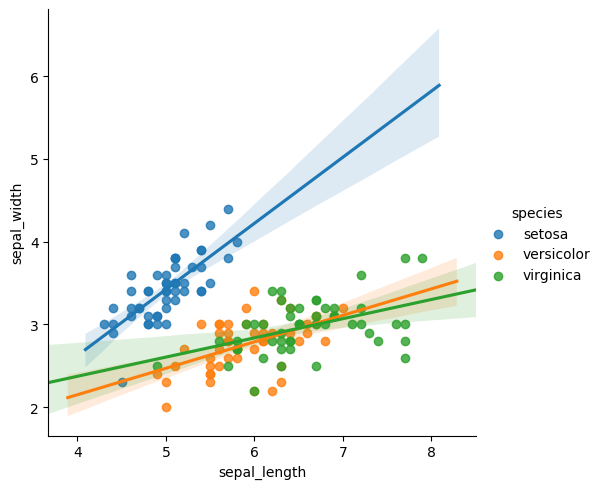

In [134]:
seaborn.lmplot(
    'sepal_length',
    'sepal_width',
    data=iris,
    hue='species',
)

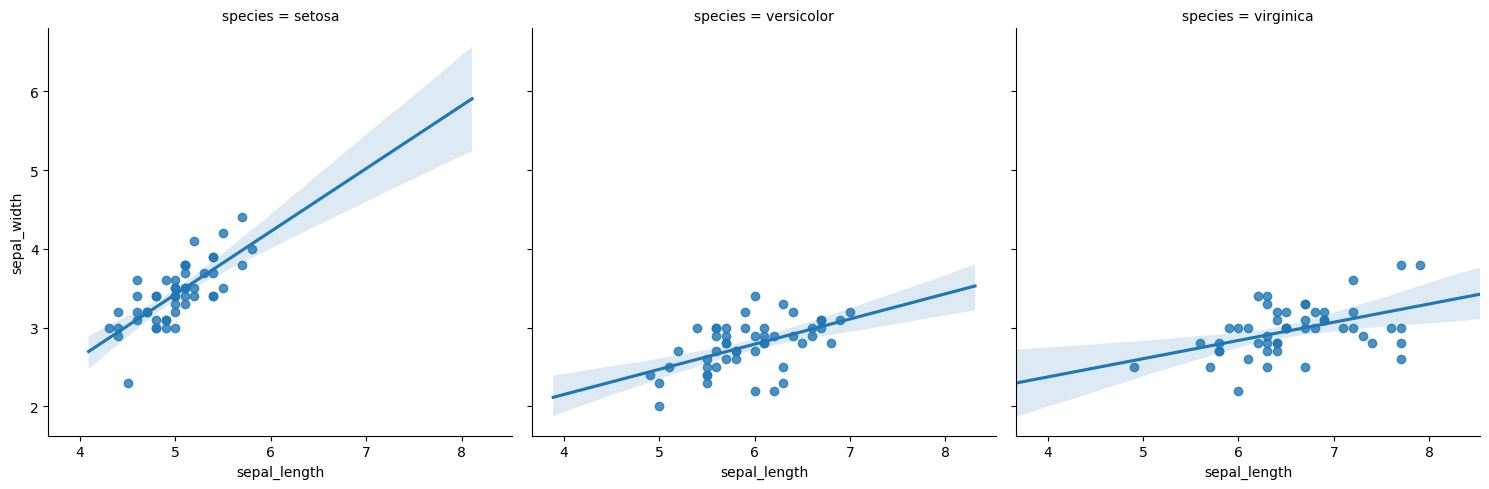

In [135]:
seaborn.lmplot(
    'sepal_length',
    'sepal_width',
    data=iris,
    col='species',
)

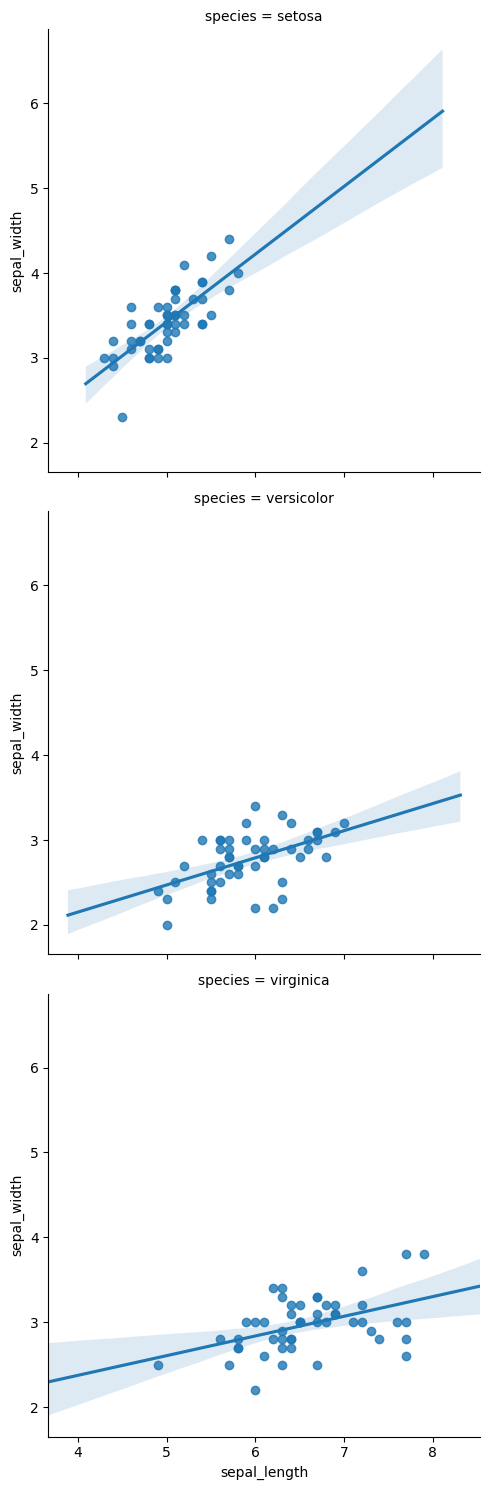

In [136]:
seaborn.lmplot(
    'sepal_length',
    'sepal_width',
    data=iris,
    row='species',
)

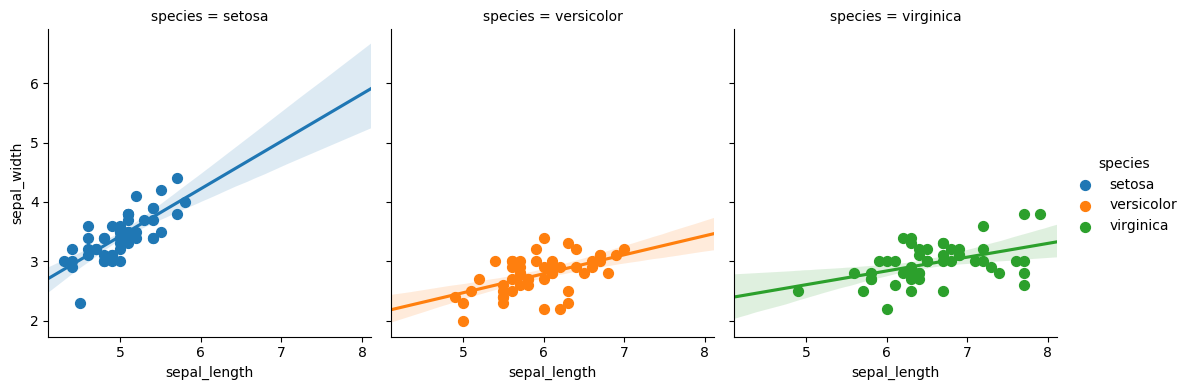

In [137]:
fg = seaborn.FacetGrid(
    data=iris,
    col='species',
    hue='species',
    height=4,
    aspect=0.9,
)
fg.map(
    plt.scatter,
    'sepal_length',
    'sepal_width', 
    s=50,
)
fg.map(
    seaborn.regplot,
    'sepal_length',
    'sepal_width', 
    scatter=False,
)
fg.add_legend();

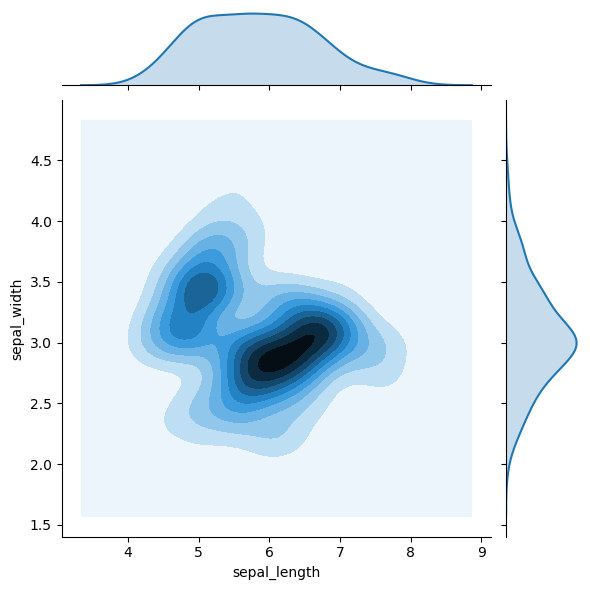

In [138]:
seaborn.jointplot(
    'sepal_length',
    'sepal_width', 
    data=iris,
    kind="kde",
);

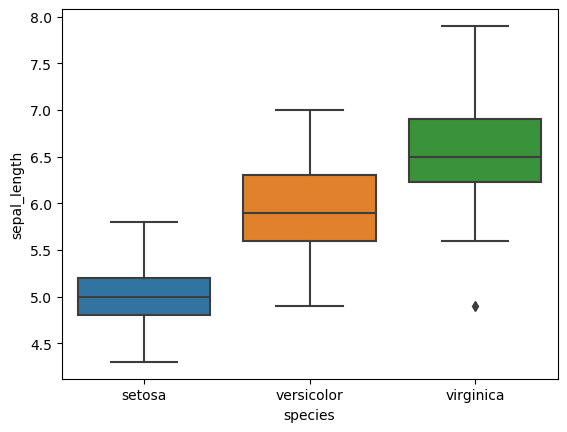

In [139]:
seaborn.boxplot(
    'species',
    'sepal_length',
    data=iris,
)

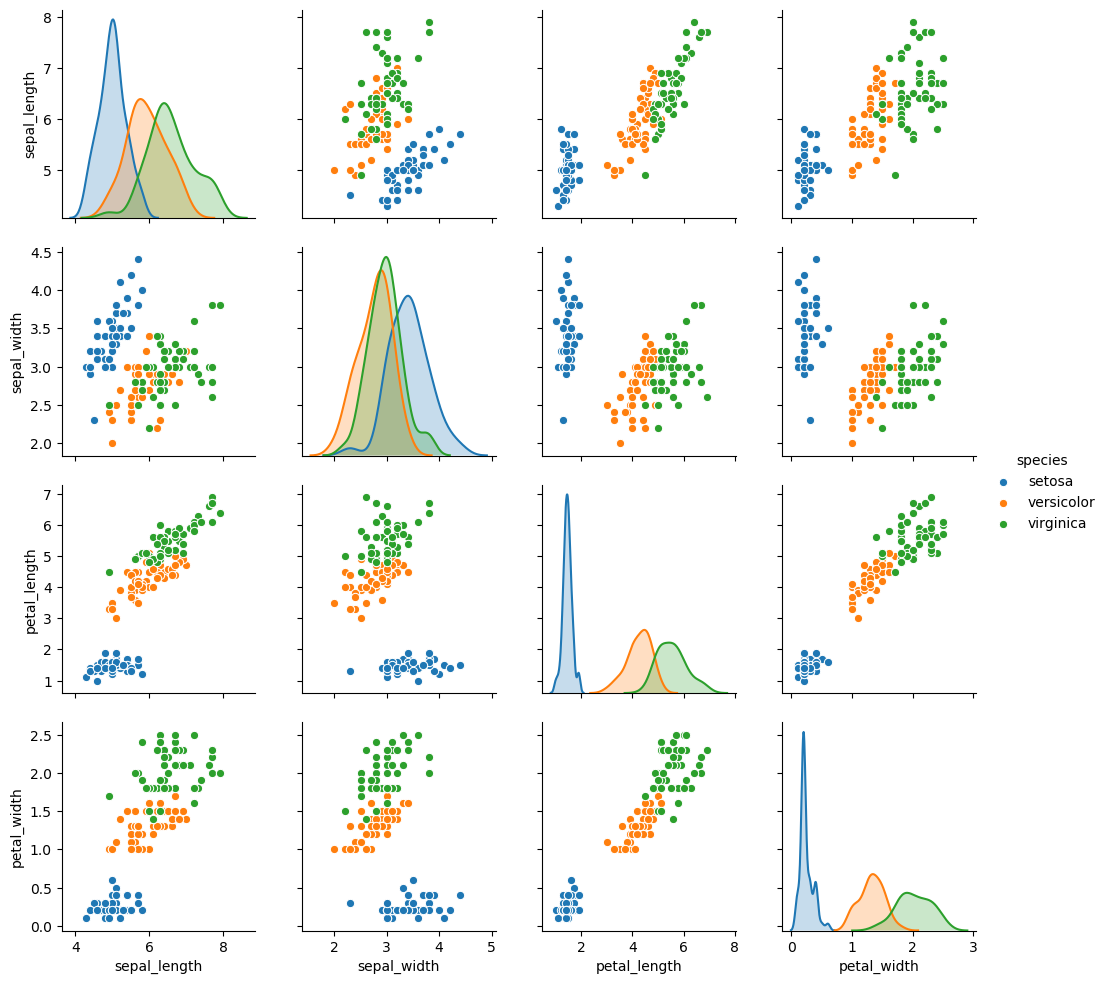

In [140]:
seaborn.pairplot(iris, hue="species")

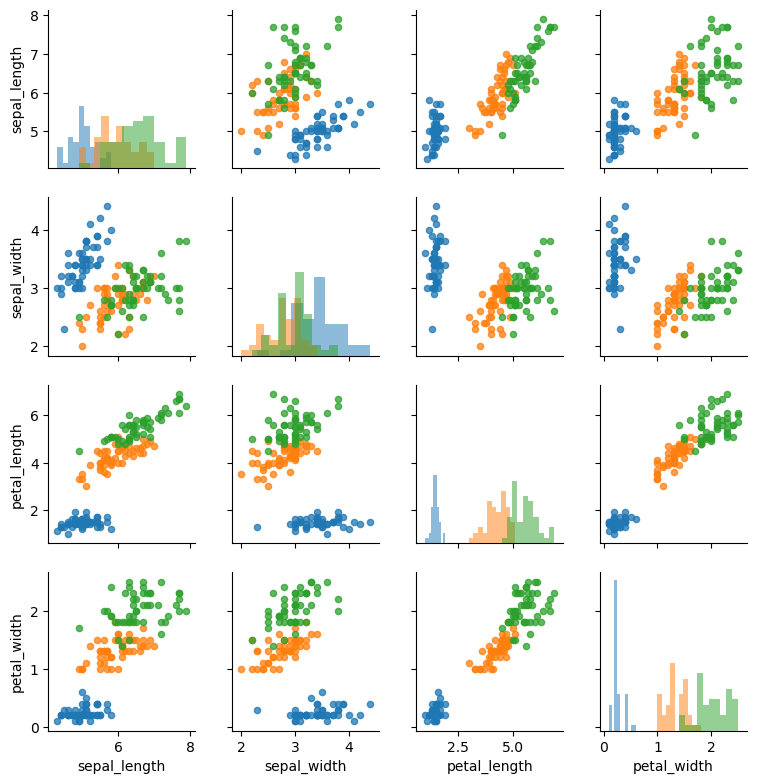

In [141]:
g = seaborn.PairGrid(
    iris,
    height=2,
    hue='species',
)
g.map_diag(plt.hist, alpha=0.5)
g.map_offdiag(plt.scatter, alpha=0.75, s=20);

## exporting a DataFrame

pandas provides various options to export dataframes, but we can divide them in two groups:

* data export
* repoting (styling)

### data export

many functions are provided to export (and read) to different formats that can then be used to load the data and perform additional analysis:

* `to_clipboard`
* `to_csv`
* `to_excel`
* `to_feather`
* `to_hdf`
* `to_json`
* `to_parquet`
* `to_sql`
* `to_stata`
* `to_xml`

there are also many other functions to convert dataframes to other data structures such as numpy array, dictionaries, xarrays, etc...

For data storage an interesting approach (superior to simple csv or tsv) is to export to JSONlines format (we'll see more in the future), by using the `lines=True` parameter in both `to_json` and `read_json`

In [9]:
data = [{'label': 'DRUG', 'pattern': 'aspirin'},
        {'label': 'DRUG', 'pattern': 'trazodone'},
        {'label': 'DRUG', 'pattern': 'citalopram'}]
df = pd.DataFrame(data)
print(df)

  label     pattern
0  DRUG     aspirin
1  DRUG   trazodone
2  DRUG  citalopram


In [10]:
# Output in JSONL format
jsonlines = df.to_json(orient='records', lines=True)
print(jsonlines)

{"label":"DRUG","pattern":"aspirin"}
{"label":"DRUG","pattern":"trazodone"}
{"label":"DRUG","pattern":"citalopram"}



In [11]:
df_clone = pd.read_json(jsonlines, lines=True)
print(df_clone)

  label     pattern
0  DRUG     aspirin
1  DRUG   trazodone
2  DRUG  citalopram


### Reporting and styling

Pandas provides also functions to export dataframes in a way compatible with reports, such as:

* `.style.to_html`
* `.style.to_latex`
* `to_markdown`


In [13]:
data = [{'label': 'DRUG', 'pattern': 'aspirin'},
        {'label': 'DRUG', 'pattern': 'trazodone'},
        {'label': 'DRUG', 'pattern': 'citalopram'}]
df = pd.DataFrame(data)
print(df.style.to_latex())

\begin{tabular}{lll}
 & label & pattern \\
0 & DRUG & aspirin \\
1 & DRUG & trazodone \\
2 & DRUG & citalopram \\
\end{tabular}



In [17]:
print(df.style.to_html())

<style type="text/css">
</style>
<table id="T_fdcf4">
  <thead>
    <tr>
      <th class="blank level0" >&nbsp;</th>
      <th id="T_fdcf4_level0_col0" class="col_heading level0 col0" >label</th>
      <th id="T_fdcf4_level0_col1" class="col_heading level0 col1" >pattern</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th id="T_fdcf4_level0_row0" class="row_heading level0 row0" >0</th>
      <td id="T_fdcf4_row0_col0" class="data row0 col0" >DRUG</td>
      <td id="T_fdcf4_row0_col1" class="data row0 col1" >aspirin</td>
    </tr>
    <tr>
      <th id="T_fdcf4_level0_row1" class="row_heading level0 row1" >1</th>
      <td id="T_fdcf4_row1_col0" class="data row1 col0" >DRUG</td>
      <td id="T_fdcf4_row1_col1" class="data row1 col1" >trazodone</td>
    </tr>
    <tr>
      <th id="T_fdcf4_level0_row2" class="row_heading level0 row2" >2</th>
      <td id="T_fdcf4_row2_col0" class="data row2 col0" >DRUG</td>
      <td id="T_fdcf4_row2_col1" class="data row2 col1" >citalopram</td>
    

pandas `style` provides a (relatively) simple way to format the table representation to make it more informative and visually pleaseant

In [52]:
expenses = [
    ('antonio', 'cat', 4),
    ('antonio', 'cat', 5),
    ('antonio', 'cat', 6),

    ('giulia', 'cat', 3),
    ('giulia', 'dog', 7),
    ('giulia', 'dog', 8),
]

expenses = pd.DataFrame(expenses, columns = ['name', 'animal', 'expenses'])
expenses

,name,animal,expenses
0,antonio,cat,4
1,antonio,cat,5
2,antonio,cat,6
3,giulia,cat,3
4,giulia,dog,7
5,giulia,dog,8


In [57]:
# can format the content with format minilanguage and functions
expenses.style.format({"expenses": "{:.2f} €", "name": str.title})

,name,animal,expenses
0,Antonio,cat,4.00 €
1,Antonio,cat,5.00 €
2,Antonio,cat,6.00 €
3,Giulia,cat,3.00 €
4,Giulia,dog,7.00 €
5,Giulia,dog,8.00 €


In [54]:
# can apply generic functions (there is a wide list)
expenses.style.highlight_max(color='coral', subset=["expenses"])

,name,animal,expenses
0,antonio,cat,4
1,antonio,cat,5
2,antonio,cat,6
3,giulia,cat,3
4,giulia,dog,7
5,giulia,dog,8


In [55]:
#can apply a generic function cell-wise, column-wise, etc...
def highlight_median(x, color):
    import numpy as np
    median =  np.median(x.to_numpy())
    style_to_apply = f"color: {color};"
    return np.where(x>median, style_to_apply, None)

expenses.style.apply(highlight_median, color='orange', subset=["expenses"])

,name,animal,expenses
0,antonio,cat,4
1,antonio,cat,5
2,antonio,cat,6
3,giulia,cat,3
4,giulia,dog,7
5,giulia,dog,8


In [59]:
# can export the styling to latex and html
latex_result = (
    expenses.style
    .format({"expenses": "{:.2f} €", "name": str.title})
    .highlight_max(
        subset=["expenses"],
        props=(
        'cellcolor:[HTML]{FFFF00}; '
        'color:{red}; '
        'bfseries: ; '
        )
    )
    .set_caption("some info about pets")
    .to_latex()
)
print(latex_result)

\begin{table}
\caption{some info about pets}
\begin{tabular}{lllr}
 & name & animal & expenses \\
0 & Antonio & cat & 4.00 € \\
1 & Antonio & cat & 5.00 € \\
2 & Antonio & cat & 6.00 € \\
3 & Giulia & cat & 3.00 € \\
4 & Giulia & dog & 7.00 € \\
5 & Giulia & dog & \cellcolor[HTML]{FFFF00} \color{red} \bfseries 8.00 € \\
\end{tabular}
\end{table}



## Exercise

Download the list of the nobel prize winners, and count the winners by category and country

### https://www.britannica.com/topic/Nobel-Prize-Winners-by-Year-1856946


Then try to correlate this information with the pro-capite consumption of beer in each country, in particular for the physics degree.

### https://en.wikipedia.org/wiki/List_of_countries_by_beer_consumption_per_capita